# Prophet

## Preamble

In [7]:
import pandas
import seaborn
import matplotlib

In [10]:
import forecast_lab

In [11]:
seaborn.set_style("ticks")
matplotlib.pyplot.rcParams["axes.grid"] = True
matplotlib.pyplot.rcParams["figure.figsize"] = (20, 3)

## Example: Forecasting Taxi Trips

In [12]:
import fbprophet

In [13]:
taxi_trips = forecast_lab.datasets.read_chicago_taxi_trips_daily()

In [14]:
taxi_trips.head()

,Trips
Date,
2013-01-01,96
2013-01-02,53
2013-01-03,61
2013-01-04,79
2013-01-05,76


Prophet expects the input time series in the format of a `pandas.DataFrame` with columns `ds` for time and `y` for values.

In [ ]:
taxi_trips_p  = pandas.DataFrame(taxi_trips).reset_index()
taxi_trips_p.columns = ["ds", "y"]

In [ ]:
taxi_trips_p.head()

In [ ]:
taxi_trips_p["ds"].max()

Now the model can be fitted to the time series:

In [ ]:
prophet_model = fbprophet.Prophet().fit(taxi_trips_p)

In order to produce a forecast, one needs to call the model's helper method `make_future_dataframe` with the parameters of the desired forecast:

In [ ]:
fd = prophet_model.make_future_dataframe(periods=10, freq="D")
fd[fd["ds"] > "2017-05-31"]

In [ ]:
ts_forecast = prophet_model.predict(
    prophet_model.make_future_dataframe(periods=100, freq="D")
)

The forecast result is a dataframe with values for the historical time series plus the future timeframe:

In [ ]:
ts_forecast[ts_forecast["ds"] > taxi_trips.index.max()]["yhat"].shape

In [ ]:
ts_forecast.tail()

In [ ]:
prophet_model.plot(ts_forecast[ts_forecast["ds"] > taxi_trips.index.max()], );

We can get some insights into the model by plotting its components - an overall trend as well as seasonal components:

In [ ]:
prophet_model.plot_components(ts_forecast);


We provide a wrapper class to use a Prophet model in the `ForecastEvaluation`:

In [ ]:
forecast_lab.ProphetWrapper??

## Evaluation

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


======== iteration 0 ==========
======== iteration 1 ==========
======== iteration 2 ==========


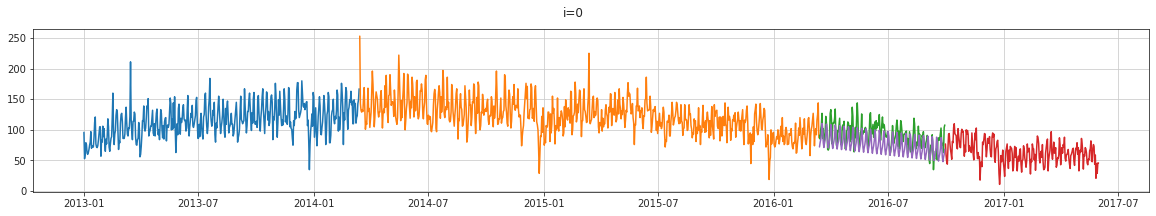

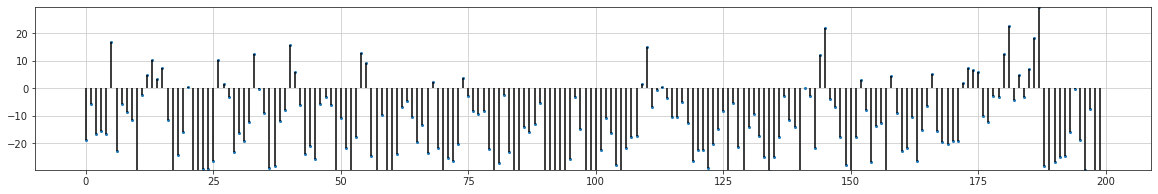

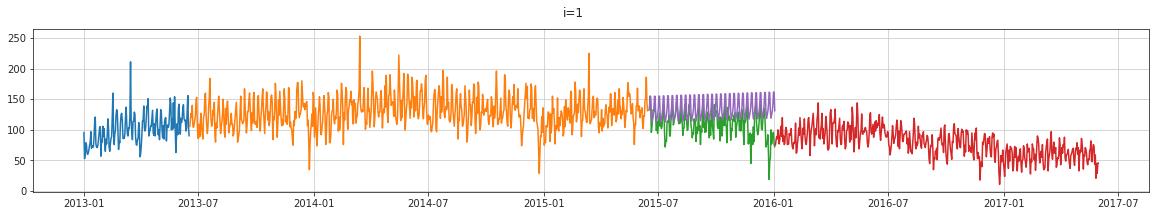

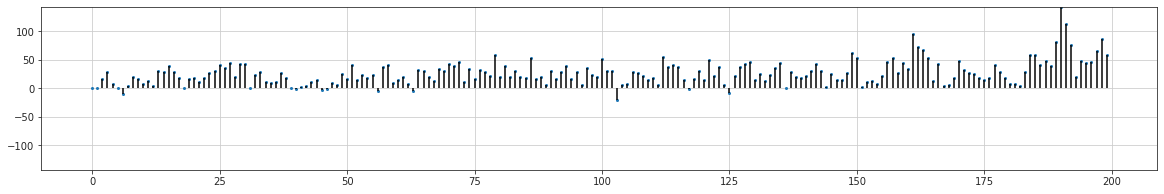

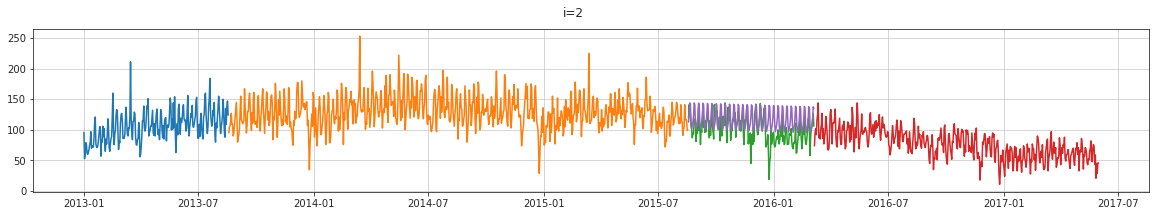

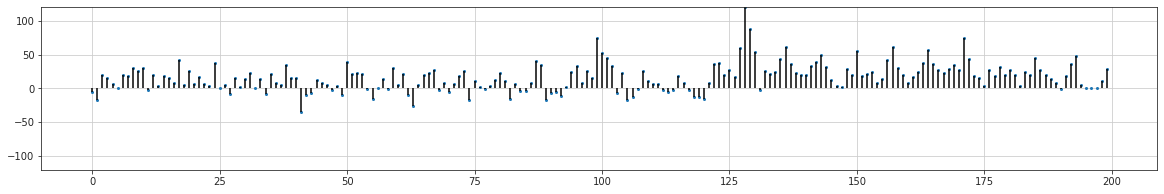

MAPE    25.264712
RSME    27.133225
dtype: float64

In [18]:
forecast_lab.ForecastEvaluation(
        ts=taxi_trips["Trips"],
        forecasting=forecast_lab.ProphetWrapper(freq="d"),
        test_window_size=200,
        train_window_size=730,
        metrics={
            "MAPE": forecast_lab.metrics.mean_absolute_percentage_error,
            "RSME": forecast_lab.metrics.root_mean_squared_error
        }
).evaluate(
    k=3, 
    plot_segments=True,
    plot_residuals=True,
).get_metrics().mean()

## References
